In [98]:
import pandas as pd
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [117]:
val_df = pd.read_csv('../data/test.csv')
val_df.head()

,Unnamed: 0,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region,has_mask,invalid
0,2996,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,True,False
1,1647,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,False,False
2,9917,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,True,False
3,1261,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,False,False
4,814,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence,True,False


In [118]:
val_df.shape
val_df.has_mask.value_counts()

False    2133
True     1555
Name: has_mask, dtype: int64

In [17]:
def is_mask_binary(path):
    img = imread(path, as_gray=True)
    unique = np.unique(img)
    
    for item in unique:
        if item not in [0, 1]:
            return False
    return True        

In [24]:
train_df['binary_mask'] = train_df['flood_label_path'].apply(is_mask_binary)

In [25]:
train_df['binary_mask'].value_counts()

True    3688
Name: binary_mask, dtype: int64

In [51]:
from torchmetrics.classification import BinaryJaccardIndex
import torch

black = torch.tensor(np.zeros((256,256)))
white = torch.tensor(np.ones((256,256)))

In [95]:
metric=BinaryJaccardIndex(ignore_index=0)

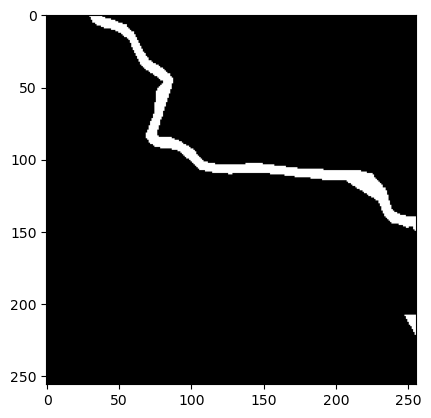

In [84]:
idx = np.random.randint(train_df.shape[0])
img = imread(train_df.iloc[idx]['flood_label_path'], as_gray=True)
plt.imshow(img, cmap='gray')

In [86]:
metric(torch.tensor(img),white)

tensor(0.0359)

In [77]:
black = torch.tensor(np.zeros((256,256)))
left = black.detach().clone()
left[:, 0:101] = 1

right = black.detach().clone()
right[:, 101:] = 1

In [78]:
metric(left, right.int())

tensor(0.)

In [96]:
metric(black, black)

tensor(nan)

In [97]:
metric(white, black)

tensor(nan)